In [99]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

df = pd.read_csv("C:/Users/Alperen Arda/OneDrive/Desktop/GitHub/FlightDelayCancellation/src/semi_clean_data.csv")
df.head()

C:\Users\Alperen Arda\AppData\Local\Temp\ipykernel_27260\3621268061.py:4: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/Alperen Arda/OneDrive/Desktop/GitHub/FlightDelayCancellation/src/semi_clean_data.csv")


,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,...,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0
1,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,...,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0
2,1,1,4,US,840,N171US,SFO,CLT,20,18.0,...,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0
3,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,...,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0
4,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,...,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0


In [100]:
from preprocess_flights import DataPreprocessor

feature_list = ['DEPARTURE_DELAY', 'TAXI_OUT', 'ELAPSED_TIME', 'TAXI_IN', 'ARRIVAL_DELAY']
process = DataPreprocessor()

df = process.outlier_analysis_single_var(df, feature_list=feature_list)

In [101]:
df['TAXI_OUT'][50:70]

50     9.0
51    11.0
52    24.0
53    15.0
54    12.0
55    22.0
56    10.0
57    19.0
58    12.0
59    16.0
60    10.0
61    23.0
62    14.0
63    16.0
64    37.0
65    21.0
66    15.0
67    15.0
68    14.0
69    12.0
Name: TAXI_OUT, dtype: float64

In [102]:
df['TAXI_OUT'].min()

np.float64(1.0)

In [103]:
bins = [-40, -20, -10, 0, 10, 20, 30, 50]
labels = ['Ultra Low', 'Very Low', 'Low', 'Medium', 'High', 'Very High', 'Ultra']
df['cat_taxi'] = pd.cut(df['ARRIVAL_DELAY'], bins=bins, labels=labels)

<Axes: xlabel='Category', ylabel='Count'>

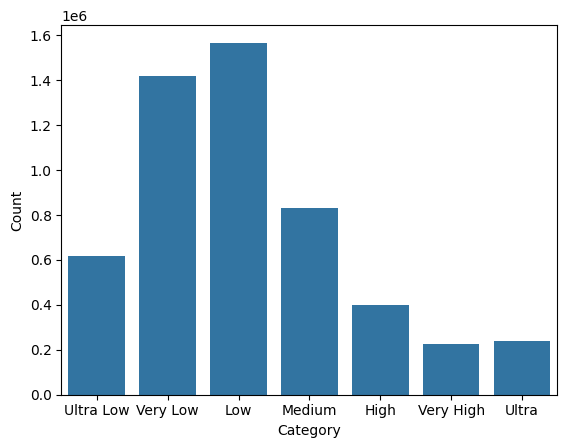

In [104]:
import seaborn as sns

category_counts = df['cat_taxi'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']  # Kolon isimlerini düzenle

sns.barplot(x=category_counts['Category'], y=category_counts['Count'])

In [105]:
df.count()

MONTH                  5714008
DAY                    5714008
DAY_OF_WEEK            5714008
AIRLINE                5714008
FLIGHT_NUMBER          5714008
TAIL_NUMBER            5714008
ORIGIN_AIRPORT         5714008
DESTINATION_AIRPORT    5714008
SCHEDULED_DEPARTURE    5714008
DEPARTURE_TIME         5714008
DEPARTURE_DELAY        5714008
TAXI_OUT               5714008
WHEELS_OFF             5714008
SCHEDULED_TIME         5714008
ELAPSED_TIME           5714008
AIR_TIME               5714008
DISTANCE               5714008
WHEELS_ON              5714008
TAXI_IN                5714008
SCHEDULED_ARRIVAL      5714008
ARRIVAL_TIME           5714008
ARRIVAL_DELAY          5714008
cat_taxi               5299315
dtype: int64

In [106]:
df = pd.read_csv("C:/Users/Alperen Arda/OneDrive/Desktop/GitHub/FlightDelayCancellation/src/semi_clean_data.csv")
df.head()

C:\Users\Alperen Arda\AppData\Local\Temp\ipykernel_27260\2608024311.py:1: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/Alperen Arda/OneDrive/Desktop/GitHub/FlightDelayCancellation/src/semi_clean_data.csv")


,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,...,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0
1,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,...,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0
2,1,1,4,US,840,N171US,SFO,CLT,20,18.0,...,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0
3,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,...,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0
4,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,...,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0


In [107]:
'''from preprocess_flights import DataPreprocessor

feature_list = ['DEPARTURE_DELAY', 'TAXI_OUT', 'ELAPSED_TIME', 'TAXI_IN', 'ARRIVAL_DELAY']


processor = DataPreprocessor()

processor.outlier_analysis_single_var(df, feature_list)
df'''

"from preprocess_flights import DataPreprocessor\n\nfeature_list = ['DEPARTURE_DELAY', 'TAXI_OUT', 'ELAPSED_TIME', 'TAXI_IN', 'ARRIVAL_DELAY']\n\n\nprocessor = DataPreprocessor()\n\nprocessor.outlier_analysis_single_var(df, feature_list)\ndf"

In [108]:
'''from preprocess_flights import DataPreprocessor

feature_list = ['DEPARTURE_DELAY', 'TAXI_OUT', 'ELAPSED_TIME', 'TAXI_IN', 'ARRIVAL_DELAY']


processor = DataPreprocessor()

processor.outlier_analysis_multi_vars(df, feature_list)

df'''

"from preprocess_flights import DataPreprocessor\n\nfeature_list = ['DEPARTURE_DELAY', 'TAXI_OUT', 'ELAPSED_TIME', 'TAXI_IN', 'ARRIVAL_DELAY']\n\n\nprocessor = DataPreprocessor()\n\nprocessor.outlier_analysis_multi_vars(df, feature_list)\n\ndf"

<Axes: >

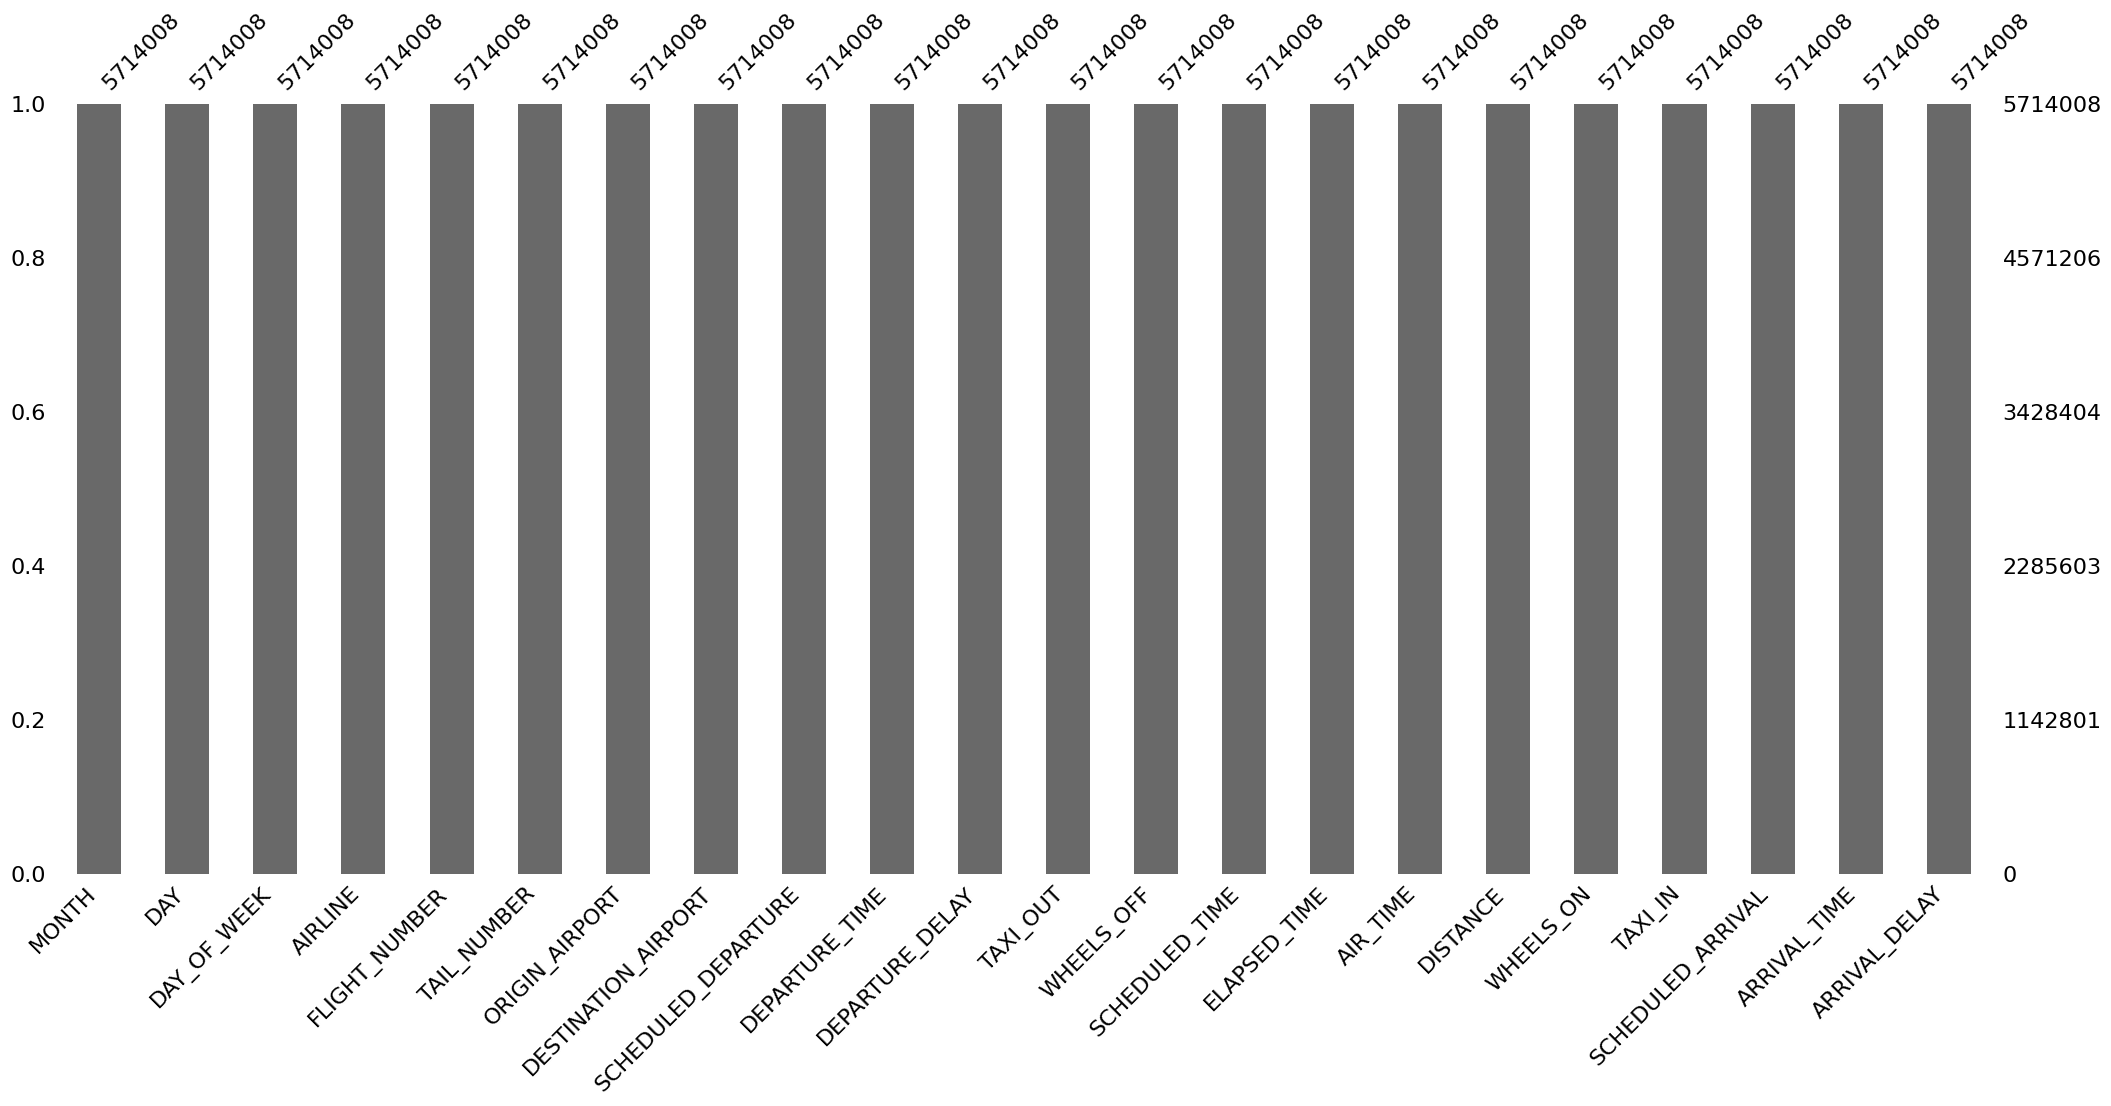

In [109]:
import missingno as msno

msno.bar(df)

c:\Users\Alperen Arda\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\Users\Alperen Arda\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

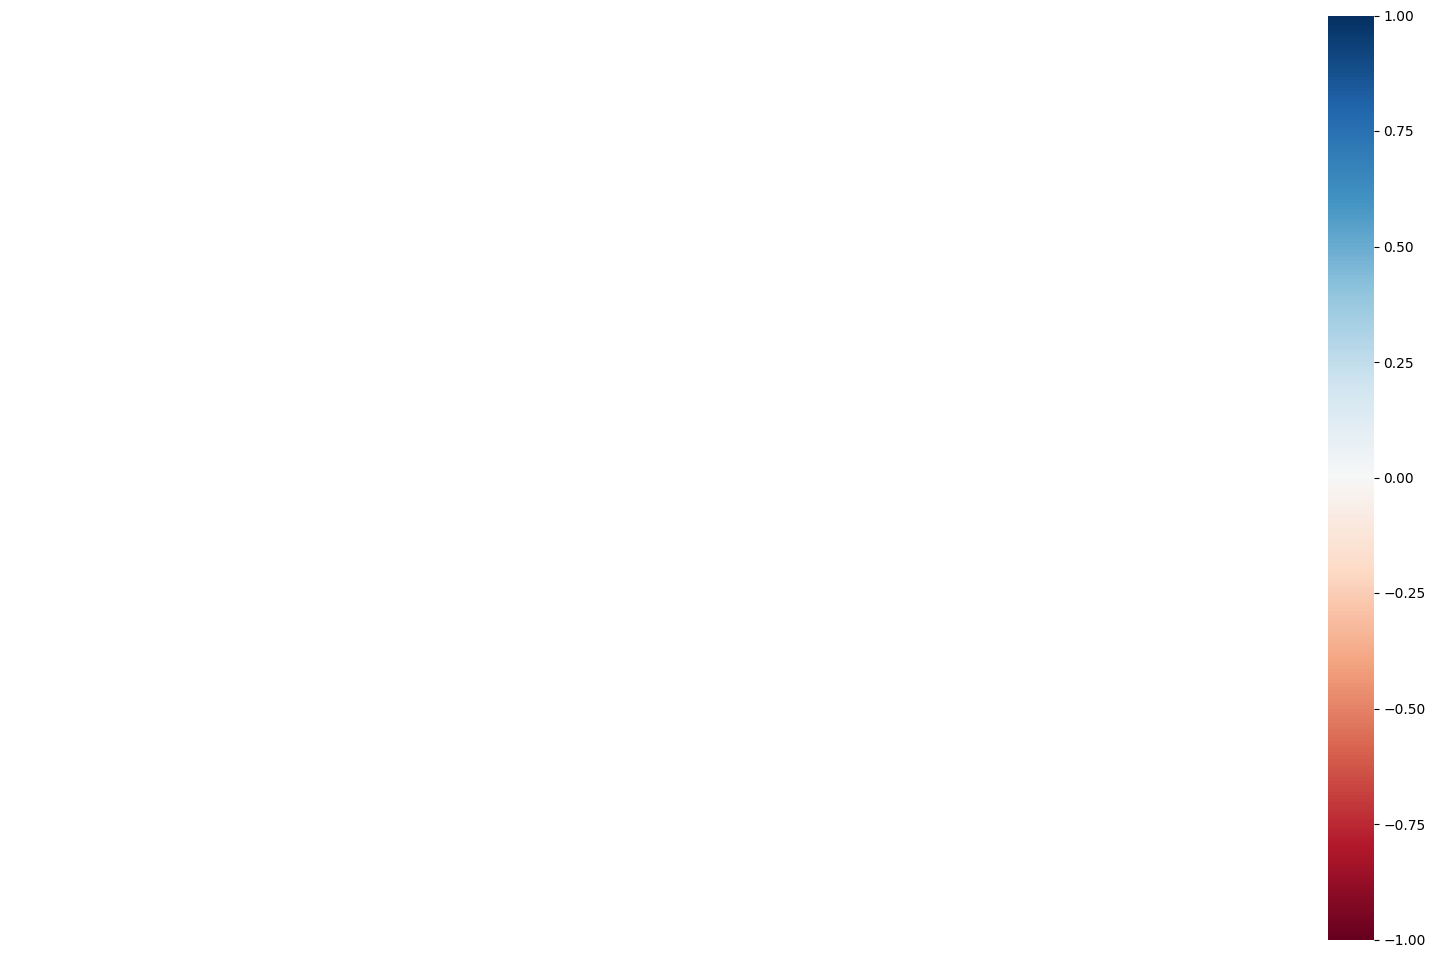

In [110]:
msno.heatmap(df)

In [111]:
df.TAIL_NUMBER.value_counts().count()

np.int64(4896)

In [112]:
df[0:20]

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,...,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0
1,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,...,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0
2,1,1,4,US,840,N171US,SFO,CLT,20,18.0,...,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0
3,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,...,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0
4,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,...,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0
5,1,1,4,DL,806,N3730B,SFO,MSP,25,20.0,...,38.0,217.0,230.0,206.0,1589,604.0,6.0,602,610.0,8.0
6,1,1,4,NK,612,N635NK,LAS,MSP,25,19.0,...,30.0,181.0,170.0,154.0,1299,504.0,5.0,526,509.0,-17.0
7,1,1,4,US,2013,N584UW,LAX,CLT,30,44.0,...,57.0,273.0,249.0,228.0,2125,745.0,8.0,803,753.0,-10.0
8,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,19.0,...,36.0,195.0,193.0,173.0,1464,529.0,3.0,545,532.0,-13.0
9,1,1,4,DL,1173,N826DN,LAS,ATL,30,33.0,...,45.0,221.0,203.0,186.0,1747,651.0,5.0,711,656.0,-15.0


In [113]:
df["ORIGIN_AIRPORT"].nunique()

934

In [114]:
df_airline = df.copy()
df_airline['AIRLINE'].value_counts()

AIRLINE
WN    1242403
DL     870275
AA     712935
OO     576814
EV     554752
UA     507762
MQ     278791
B6     262042
US     194223
AS     171439
NK     115193
F9      90090
HA      76041
VX      61248
Name: count, dtype: int64

In [115]:
frequency = df_airline['AIRLINE'].value_counts(normalize=True)
df_airline['AIRLINE'] = df_airline['AIRLINE'].map(frequency)
df_airline[0:20]

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,1,1,4,0.030003,98,N407AS,ANC,SEA,5,2354.0,...,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0
1,1,1,4,0.124770,2336,N3KUAA,LAX,PBI,10,2.0,...,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0
2,1,1,4,0.033991,840,N171US,SFO,CLT,20,18.0,...,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0
3,1,1,4,0.124770,258,N3HYAA,LAX,MIA,20,15.0,...,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0
4,1,1,4,0.030003,135,N527AS,SEA,ANC,25,24.0,...,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0
5,1,1,4,0.152306,806,N3730B,SFO,MSP,25,20.0,...,38.0,217.0,230.0,206.0,1589,604.0,6.0,602,610.0,8.0
6,1,1,4,0.020160,612,N635NK,LAS,MSP,25,19.0,...,30.0,181.0,170.0,154.0,1299,504.0,5.0,526,509.0,-17.0
7,1,1,4,0.033991,2013,N584UW,LAX,CLT,30,44.0,...,57.0,273.0,249.0,228.0,2125,745.0,8.0,803,753.0,-10.0
8,1,1,4,0.124770,1112,N3LAAA,SFO,DFW,30,19.0,...,36.0,195.0,193.0,173.0,1464,529.0,3.0,545,532.0,-13.0
9,1,1,4,0.152306,1173,N826DN,LAS,ATL,30,33.0,...,45.0,221.0,203.0,186.0,1747,651.0,5.0,711,656.0,-15.0


In [116]:
df_flight = df_airline.copy()

In [117]:
bam = df.groupby('FLIGHT_NUMBER')['ARRIVAL_DELAY'].mean()
bam

FLIGHT_NUMBER
1       -1.755932
2       -2.864865
3        3.027739
4       -4.733181
5        3.387154
          ...    
8409   -21.000000
8410    19.000000
8442    -9.000000
8445   -13.000000
9320    36.000000
Name: ARRIVAL_DELAY, Length: 6946, dtype: float64

In [118]:
df_flight.loc[(df_flight['ORIGIN_AIRPORT'] == 'JFK') & (df['DESTINATION_AIRPORT'] == 'LAX') & (df_flight['FLIGHT_NUMBER'] == 1323)]

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
4797206,11,1,7,0.04586,1323,N935JB,JFK,LAX,2230,2243.0,...,2300.0,368.0,369.0,331.0,2475,131.0,21.0,138,152.0,14.0
4813541,11,2,1,0.04586,1323,N947JB,JFK,LAX,2230,2231.0,...,2248.0,368.0,349.0,326.0,2475,114.0,6.0,138,120.0,-18.0
4845467,11,4,3,0.04586,1323,N929JB,JFK,LAX,2230,2226.0,...,2245.0,368.0,369.0,343.0,2475,128.0,7.0,138,135.0,-3.0
4861795,11,5,4,0.04586,1323,N935JB,JFK,LAX,2230,2225.0,...,2257.0,368.0,405.0,364.0,2475,201.0,9.0,138,210.0,32.0
4878214,11,6,5,0.04586,1323,N942JB,JFK,LAX,2230,2228.0,...,2246.0,368.0,370.0,349.0,2475,135.0,3.0,138,138.0,0.0
4906600,11,8,7,0.04586,1323,N946JB,JFK,LAX,2230,8.0,...,34.0,368.0,354.0,324.0,2475,258.0,4.0,138,302.0,84.0
4923025,11,9,1,0.04586,1323,N944JB,JFK,LAX,2230,2227.0,...,2255.0,368.0,399.0,363.0,2475,158.0,8.0,138,206.0,28.0
4954960,11,11,3,0.04586,1323,N934JB,JFK,LAX,2230,2224.0,...,2243.0,368.0,407.0,379.0,2475,202.0,9.0,138,211.0,33.0
4971434,11,12,4,0.04586,1323,N946JB,JFK,LAX,2230,2228.0,...,2300.0,368.0,381.0,341.0,2475,141.0,8.0,138,149.0,11.0
4987947,11,13,5,0.04586,1323,N944JB,JFK,LAX,2230,2302.0,...,2321.0,368.0,353.0,331.0,2475,152.0,3.0,138,155.0,17.0


In [119]:
df_tail = df.copy()
df_tail['TAIL_NUMBER'].value_counts()

TAIL_NUMBER
N480HA    3765
N484HA    3722
N488HA    3720
N493HA    3582
N478HA    3575
          ... 
N121UA       1
N180UA       1
N7LEAA       1
N175UA       1
N860NW       1
Name: count, Length: 4896, dtype: int64

In [120]:
df_tirek = df.copy()
df_tirek.drop('FLIGHT_NUMBER', axis=1, inplace=True)

In [121]:
df_tirek.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,1,1,4,AS,N407AS,ANC,SEA,5,2354.0,-11.0,...,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0
1,1,1,4,AA,N3KUAA,LAX,PBI,10,2.0,-8.0,...,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0
2,1,1,4,US,N171US,SFO,CLT,20,18.0,-2.0,...,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0
3,1,1,4,AA,N3HYAA,LAX,MIA,20,15.0,-5.0,...,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0
4,1,1,4,AS,N527AS,SEA,ANC,25,24.0,-1.0,...,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0


In [122]:
df_tirek.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5714008 entries, 0 to 5714007
Data columns (total 21 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY                  int64  
 2   DAY_OF_WEEK          int64  
 3   AIRLINE              object 
 4   TAIL_NUMBER          object 
 5   ORIGIN_AIRPORT       object 
 6   DESTINATION_AIRPORT  object 
 7   SCHEDULED_DEPARTURE  int64  
 8   DEPARTURE_TIME       float64
 9   DEPARTURE_DELAY      float64
 10  TAXI_OUT             float64
 11  WHEELS_OFF           float64
 12  SCHEDULED_TIME       float64
 13  ELAPSED_TIME         float64
 14  AIR_TIME             float64
 15  DISTANCE             int64  
 16  WHEELS_ON            float64
 17  TAXI_IN              float64
 18  SCHEDULED_ARRIVAL    int64  
 19  ARRIVAL_TIME         float64
 20  ARRIVAL_DELAY        float64
dtypes: float64(11), int64(6), object(4)
memory usage: 915.5+ MB


In [123]:
df_tirek.head()
# DEPARTURE TIME

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,1,1,4,AS,N407AS,ANC,SEA,5,2354.0,-11.0,...,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0
1,1,1,4,AA,N3KUAA,LAX,PBI,10,2.0,-8.0,...,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0
2,1,1,4,US,N171US,SFO,CLT,20,18.0,-2.0,...,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0
3,1,1,4,AA,N3HYAA,LAX,MIA,20,15.0,-5.0,...,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0
4,1,1,4,AS,N527AS,SEA,ANC,25,24.0,-1.0,...,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0


In [124]:
df_tirek["SCHEDULED_DEPARTURE"][568:580]

568    630
569    630
570    630
571    630
572    630
573    630
574    630
575    630
576    630
577    631
578    632
579    632
Name: SCHEDULED_DEPARTURE, dtype: int64

In [125]:
df_tirek["DEP_HOUR"] = df_tirek["SCHEDULED_DEPARTURE"] // 100
df_tirek["DEP_MINUTE"] = df_tirek["SCHEDULED_DEPARTURE"] % 100

In [126]:
df_tirek.loc[(df_tirek['DEP_HOUR'] == 9)]

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DEP_HOUR,DEP_MINUTE
2262,1,1,4,US,N637AW,MCI,CLT,900,901.0,1.0,...,124.0,97.0,808,1150.0,15.0,1206,1205.0,-1.0,9,0
2263,1,1,4,US,N157UW,LAS,PHL,900,858.0,-2.0,...,256.0,238.0,2176,1610.0,4.0,1641,1614.0,-27.0,9,0
2264,1,1,4,US,N701UW,CLT,PHL,900,857.0,-3.0,...,75.0,61.0,449,1007.0,5.0,1032,1012.0,-20.0,9,0
2265,1,1,4,US,N813AW,ORF,CLT,900,851.0,-9.0,...,111.0,61.0,290,1030.0,12.0,1035,1042.0,7.0,9,0
2266,1,1,4,UA,N443UA,LGA,ORD,900,854.0,-6.0,...,145.0,129.0,733,1016.0,3.0,1039,1019.0,-20.0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5705070,12,31,4,AA,N3CCAA,LGA,DFW,959,953.0,-6.0,...,262.0,241.0,1389,1309.0,6.0,1319,1315.0,-4.0,9,59
5705071,12,31,4,AA,N926UW,SAN,PHX,959,1021.0,22.0,...,71.0,47.0,304,1225.0,7.0,1215,1232.0,17.0,9,59
5705072,12,31,4,AA,N816AW,SMF,PHX,959,1005.0,6.0,...,96.0,83.0,647,1238.0,3.0,1243,1241.0,-2.0,9,59
5705073,12,31,4,AA,N155UW,DFW,CLT,959,955.0,-4.0,...,150.0,113.0,936,1315.0,10.0,1322,1325.0,3.0,9,59


In [127]:
ksi = DataPreprocessor()
df_dropped = df.copy()
df_dropped = ksi.drop_items(df)
df_dropped

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
0,1,1,4,AS,N407AS,ANC,SEA,5,1448,430,-22.0
1,1,1,4,AA,N3KUAA,LAX,PBI,10,2330,750,-9.0
2,1,1,4,US,N171US,SFO,CLT,20,2296,806,5.0
3,1,1,4,AA,N3HYAA,LAX,MIA,20,2342,805,-9.0
4,1,1,4,AS,N527AS,SEA,ANC,25,1448,320,-21.0
...,...,...,...,...,...,...,...,...,...,...,...
5714003,12,31,4,B6,N657JB,LAX,BOS,2359,2611,819,-26.0
5714004,12,31,4,B6,N828JB,JFK,PSE,2359,1617,446,-16.0
5714005,12,31,4,B6,N913JB,JFK,SJU,2359,1598,440,-8.0
5714006,12,31,4,B6,N527JB,MCO,SJU,2359,1189,340,-10.0


In [128]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5714008 entries, 0 to 5714007
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY                  int64  
 2   DAY_OF_WEEK          int64  
 3   AIRLINE              object 
 4   TAIL_NUMBER          object 
 5   ORIGIN_AIRPORT       object 
 6   DESTINATION_AIRPORT  object 
 7   SCHEDULED_DEPARTURE  int64  
 8   DISTANCE             int64  
 9   SCHEDULED_ARRIVAL    int64  
 10  ARRIVAL_DELAY        float64
dtypes: float64(1), int64(6), object(4)
memory usage: 479.5+ MB


In [129]:
df.isnull().sum()

MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DISTANCE               0
SCHEDULED_ARRIVAL      0
ARRIVAL_DELAY          0
dtype: int64

In [130]:
df["TAIL_NUMBER"][234: 265]

234    N236JB
235    N519JB
236    N715JB
237    N598JB
238    N618JB
239    N203JB
240    N967DL
241    N323NB
242    N341NW
243    N995AT
244    N931DN
245    N3748Y
246    N988DL
247    N682DA
248    N966AT
249    N612DL
250    N912DE
251    N358NW
252    N3JVAA
253    N947DN
254    N813DN
255    N974DL
256    N554NW
257    N903DE
258    N532US
259    N952DL
260    N934AT
261    N905DA
262    N193JB
263    N523JB
264    N535JB
Name: TAIL_NUMBER, dtype: object

In [131]:
df.count()

MONTH                  5714008
DAY                    5714008
DAY_OF_WEEK            5714008
AIRLINE                5714008
TAIL_NUMBER            5714008
ORIGIN_AIRPORT         5714008
DESTINATION_AIRPORT    5714008
SCHEDULED_DEPARTURE    5714008
DISTANCE               5714008
SCHEDULED_ARRIVAL      5714008
ARRIVAL_DELAY          5714008
dtype: int64

Starting fast processing...
Analyzing single outlier variables...
Processed as single outlier analysis. (%30)
Analyzing multi outlier variables...
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Alperen Arda\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3548, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Alperen Arda\AppData\Local\Temp\ipykernel_27260\3655704331.py", line 7, in <module>
    preprocessor.fast_process(df, feature_list=feature_list)
  File "c:\Users\Alperen Arda\OneDrive\Desktop\GitHub\FlightDelayCancellation\src\preprocess_flights.py", line 130, in fast_process
  File "c:\Users\Alperen Arda\OneDrive\Desktop\GitHub\FlightDelayCancellation\src\preprocess_flights.py", line 74, in outlier_analysis_multi_vars
    reduced_df = pca.fit_transform(df_continuous)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Alperen Arda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  